# Introduction and Objective :
 

This project explores logistic regression using the kaggle Adult Income data set. 
We will try to predict the salary class of a person based upon the given information.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib  import pyplot

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import the metrics class
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score,precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix



# Import Dataset

In [2]:
df = pd.read_csv("C:/Users/harsha/Desktop/ML/Adult Income dataset.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.shape

(48842, 15)

In [7]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# let's see numerical and categorical variables 

In [9]:
df.describe(include= ['object'])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [10]:
df.describe(include = ["int64", "float"])

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# EDA and Data Pre- Processing 

In [11]:
S_char = df.select_dtypes(exclude=['number']).apply(lambda x: x.str.contains('\?'))

In [12]:
S_char

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,True,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,True,False,False,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


  Worclass and occupation columns only contains special character(?) as missing value

In [13]:
# To find the total number of special character in dataset

n = df.select_dtypes(exclude=['number']).apply(lambda x: x.str.contains('\?')).any(axis=1).sum()

In [14]:
n

3620

In [15]:
# find the percentage of missing data in dataset
mss_val = n* 100/len(df)

In [16]:
mss_val

7.411653904426518

In [17]:
# we can only 7% data is missing overall hence will drop this value from dataset or can replace with most frequnt category of column

# we know this special character only present in two columns, hence will choose those columns to drop or replace value

df['workclass'].value_counts()


Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [18]:
df['occupation'].value_counts()


Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [19]:
# as we see in occupation , most of categories frequncy is somewhat nearby so will replace (?) this with mode value 

df['occupation'] = df['occupation'].replace('?','Prof-specialty')


In [20]:
df['occupation'].value_counts()

Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [21]:
df['workclass'] = df['workclass'].replace('?', "Private")

In [22]:
df['workclass'].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

From structure opuput, we can see that some of those columns have a huge numbers of categories. we can merge them with their respective labels ,so can reduce the number of features.

In [23]:
less = len(df[df.income == 0])
greater  = len(df[df.income == 1])
print("percentage of less income: {:.2f}%".format((less/(len(df.income))*100)))
print("percentage of greater income : {:.2f}%".format((greater/(len(df.income))*100)))  

percentage of less income: 0.00%
percentage of greater income : 0.00%


# country combining 

There are many countries here, we can merge them to their respective regions.

In [24]:
df.rename(columns= {'native-country':'country'}, inplace = True)

In [25]:
df['country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [26]:
df['country'] = df['country'].replace('?', "United-States")

In [27]:
df['country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

In [28]:
df.loc[df.country != 'United-States','country'] = "Non-US"

In [29]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
country            object
income             object
dtype: object

In [30]:
# convert Salary to integer (as machine only understand numerical values not factor)

df['income'].replace({'<=50K': 0, ' >50K ': 1 }, inplace = True)



df.loc[df.income != 0, 'income'] = 1


In [31]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [32]:
# convert country in integer 

df['country'] = df['country'].map({'United-States':1,'Non-US': 0}).astype(int)

In [33]:
# convert sex in integer

df['gender'] = df['gender'].map({'Male': 1, "Female": 0}).astype(int)

In [34]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,1,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,1,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,1,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,1,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,0,0,0,30,1,0


In [35]:
# let's check relationship with income 

df[['relationship','income']].groupby(['relationship']).mean()

,income
relationship,
Husband,0.448671
Not-in-family,0.101407
Other-relative,0.034529
Own-child,0.014642
Unmarried,0.060293
Wife,0.468897


In [36]:
# Before processing , will check with the marital-status relation with income 

df[['marital-status','income']].groupby(['marital-status']).mean()



,income
marital-status,
Divorced,0.101161
Married-AF-spouse,0.378378
Married-civ-spouse,0.446133
Married-spouse-absent,0.092357
Never-married,0.045480
Separated,0.064706
Widowed,0.084321


By seeing data, we can say that Husband and wife contributes most of income part in relationship.Similarly, Married couple shares more contribution almost same in all category compared to other single categories.  

In [37]:
# relationship between country and income

df[['country','income']].groupby(['country']).mean()


,income
country,
0,0.186131
1,0.244221


In [38]:
# Find Correlation betweeen columns 

def plot_correlation(df):
    corr= df.corr()
    fig, ax =plt.subplots(figsize=(10,8))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

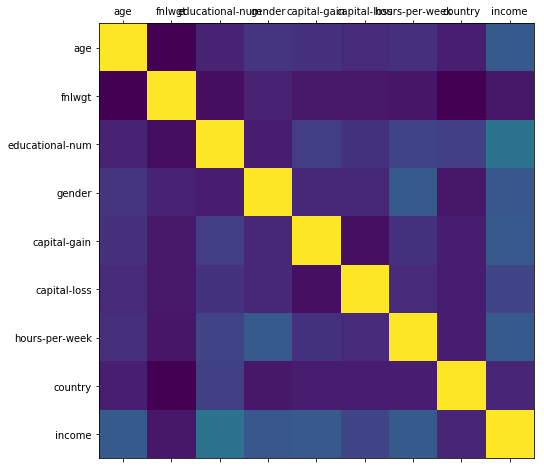

In [39]:
plot_correlation(df)

In [40]:
#So, will categorise marital-status into single and couple 

df['marital-status'] = df['marital-status'].replace(['Divorced','Married-spouse-absent','Never-married','Separated','Widowed'], 'Single')
df['marital-status'] = df['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse'], 'Couple')

In [41]:
df[['marital-status', 'income']].groupby(['marital-status']).mean()

,income
marital-status,
Couple,0.446021
Single,0.063914


couple shared half percent of income whereas, single shared less than 1% share.

In [42]:
# will check the relationship with marital-status to income 

df[['marital-status','relationship', 'income']].groupby(['marital-status','relationship']).mean()


income
marital-status relationship            
Couple         Husband         0.448671
               Not-in-family   0.217391
               Other-relative  0.143564
               Own-child       0.173611
               Wife            0.468897
Single         Not-in-family   0.101194
               Other-relative  0.017638
               Own-child       0.011564
               Unmarried       0.060293

We can see from here that in couple share 90% of income share.

In [43]:

df.loc[df['marital-status'] == 'Couple', 'marital-status'] = 0
df.loc[df['marital-status'] == 'Single', 'marital-status'] = 1

In [44]:

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income
0,25,Private,226802,11th,7,1,Machine-op-inspct,Own-child,Black,1,0,0,40,1,0
1,38,Private,89814,HS-grad,9,0,Farming-fishing,Husband,White,1,0,0,50,1,0
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,Husband,White,1,0,0,40,1,1
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,Husband,Black,1,7688,0,40,1,1
4,18,Private,103497,Some-college,10,1,Prof-specialty,Own-child,White,0,0,0,30,1,0


In [45]:
df['relationship'] = df['relationship'].map({'Unmarried' : 0, 'Wife': 1, 'Husband': 2, 'Not-in-family':3, 'Own-child':4, 'Other-relative':5}).astype(int)

In [46]:
df.head(100)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income
0,25,Private,226802,11th,7,1,Machine-op-inspct,4,Black,1,0,0,40,1,0
1,38,Private,89814,HS-grad,9,0,Farming-fishing,2,White,1,0,0,50,1,0
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,2,White,1,0,0,40,1,1
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,2,Black,1,7688,0,40,1,1
4,18,Private,103497,Some-college,10,1,Prof-specialty,4,White,0,0,0,30,1,0
5,34,Private,198693,10th,6,1,Other-service,3,White,1,0,0,30,1,0
6,29,Private,227026,HS-grad,9,1,Prof-specialty,0,Black,1,0,0,40,1,0
7,63,Self-emp-not-inc,104626,Prof-school,15,0,Prof-specialty,2,White,1,3103,0,32,1,1
8,24,Private,369667,Some-college,10,1,Other-service,0,White,0,0,0,40,1,0
9,55,Private,104996,7th-8th,4,0,Craft-repair,2,White,1,0,0,10,1,0


In [47]:
df[['race', 'income']].groupby('race').mean()

,income
race,
Amer-Indian-Eskimo,0.117021
Asian-Pac-Islander,0.269256
Black,0.120811
Other,0.123153
White,0.253987


In [48]:
df['race'] = df['race'].map({'White' : 0, 'Amer-Indian-Eskimo': 1, 'Asian-Pac-Islander': 2, 'Black':3, 'Other':4 }).astype(int)

In [49]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income
0,25,Private,226802,11th,7,1,Machine-op-inspct,4,3,1,0,0,40,1,0
1,38,Private,89814,HS-grad,9,0,Farming-fishing,2,0,1,0,0,50,1,0
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,2,0,1,0,0,40,1,1
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,2,3,1,7688,0,40,1,1
4,18,Private,103497,Some-college,10,1,Prof-specialty,4,0,0,0,0,30,1,0


In [50]:
df[['occupation','income']].groupby(['occupation']).mean()

,income
occupation,
Adm-clerical,0.136874
Armed-Forces,0.333333
Craft-repair,0.226276
Exec-managerial,0.477818
Farming-fishing,0.116107
Handlers-cleaners,0.066602
Machine-op-inspct,0.123097
Other-service,0.041438
Priv-house-serv,0.012397


In [51]:
df[['workclass','income']].groupby(['workclass']).mean()

,income
workclass,
Federal-gov,0.391760
Local-gov,0.295599
Never-worked,0.000000
Private,0.208473
Self-emp-inc,0.553392
Self-emp-not-inc,0.278871
State-gov,0.267542
Without-pay,0.095238


In [52]:
def f(x):
    if x['workclass'] == 'Federal-gov' or x['workclass'] == 'Local-gov' or x['workclass'] == 'State-gov' : return 'govt'
    elif x['workclass'] == 'Private' : return 'private'
    elif x['workclass'] == 'Self-emp-inc' or x['workclass'] == 'Self-emp-not-inc' : return 'self_employed'
    else : return 'Without-pay'

In [53]:
  df['employment_type'] = df.apply(f, axis = 1)

In [54]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income,employment_type
0,25,Private,226802,11th,7,1,Machine-op-inspct,4,3,1,0,0,40,1,0,private
1,38,Private,89814,HS-grad,9,0,Farming-fishing,2,0,1,0,0,50,1,0,private
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,2,0,1,0,0,40,1,1,govt
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,2,3,1,7688,0,40,1,1,private
4,18,Private,103497,Some-college,10,1,Prof-specialty,4,0,0,0,0,30,1,0,private


In [55]:
df[['employment_type', 'income']].groupby(['employment_type']).mean()

,income
employment_type,
Without-pay,0.064516
govt,0.308139
private,0.208473
self_employed,0.362606


In [56]:
df['employment_type'] = df['employment_type'].map({'govt' : 0, 'private': 1, 'self_employed': 2, 'Without-pay':3 }).astype(int)

In [57]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income,employment_type
0,25,Private,226802,11th,7,1,Machine-op-inspct,4,3,1,0,0,40,1,0,1
1,38,Private,89814,HS-grad,9,0,Farming-fishing,2,0,1,0,0,50,1,0,1
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,2,0,1,0,0,40,1,1,0
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,2,3,1,7688,0,40,1,1,1
4,18,Private,103497,Some-college,10,1,Prof-specialty,4,0,0,0,0,30,1,0,1


In [58]:
df[['education', 'income']].groupby(['education']).mean()

,income
education,
10th,0.062635
11th,0.050773
12th,0.073059
1st-4th,0.032389
5th-6th,0.053045
7th-8th,0.064921
9th,0.054233
Assoc-acdm,0.257964
Assoc-voc,0.253275


 Education, occupation has more number of unique categories , which creates more inflation in data hence dropping these two categories.

 #workclass converted into employment_type hence dropping this column also.   
    

In [59]:
df.drop(columns = ['workclass', 'education', 'occupation'], axis = 1, inplace = True)

In [60]:
df.head()

,age,fnlwgt,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income,employment_type
0,25,226802,7,1,4,3,1,0,0,40,1,0,1
1,38,89814,9,0,2,0,1,0,0,50,1,0,1
2,28,336951,12,0,2,0,1,0,0,40,1,1,0
3,44,160323,10,0,2,3,1,7688,0,40,1,1,1
4,18,103497,10,1,4,0,0,0,0,30,1,0,1


now need to scale numerical values , before that will check their distribution through histogram 

C:\Users\harsha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000060409441D0>,
      dtype=object)

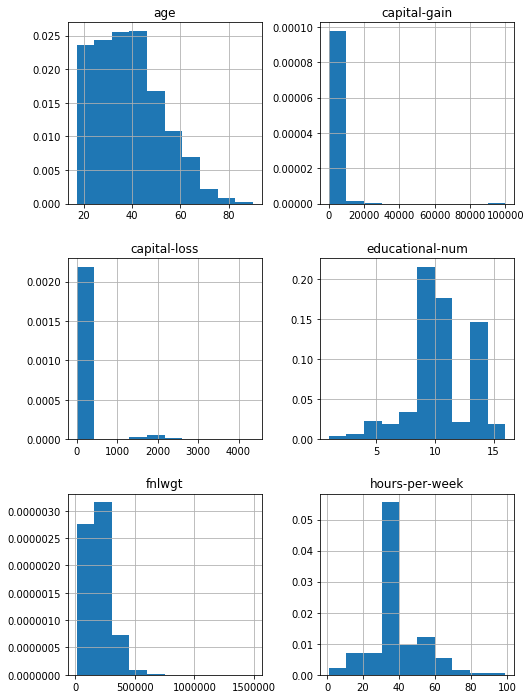

In [61]:

 
fig = plt.figure(figsize = (8,12))
ax = fig.gca()
df.hist(column = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week'], bins = None, density = True, normed = None, ax = ax)


we can see "capital gain", "capital loss", "fnlwgt" is highly positive skewed comapred to "age" whereas, educational-num is left skewed.
 "hours-per-week" shows slighlthy normal distribution.

In [62]:
# will apply mim-max scaler on "cpital loss" and "capital gain"

columns = ['capital-gain','capital-loss']


from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df[columns] = min_max.fit_transform(df[columns])

In [63]:
df.head(10)

,age,fnlwgt,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income,employment_type
0,25,226802,7,1,4,3,1,0.000000,0.0,40,1,0,1
1,38,89814,9,0,2,0,1,0.000000,0.0,50,1,0,1
2,28,336951,12,0,2,0,1,0.000000,0.0,40,1,1,0
3,44,160323,10,0,2,3,1,0.076881,0.0,40,1,1,1
4,18,103497,10,1,4,0,0,0.000000,0.0,30,1,0,1
5,34,198693,6,1,3,0,1,0.000000,0.0,30,1,0,1
6,29,227026,9,1,0,3,1,0.000000,0.0,40,1,0,1
7,63,104626,15,0,2,0,1,0.031030,0.0,32,1,1,2
8,24,369667,10,1,0,0,0,0.000000,0.0,40,1,0,1
9,55,104996,4,0,2,0,1,0.000000,0.0,10,1,0,1


In [64]:

df.dtypes

age                  int64
fnlwgt               int64
educational-num      int64
marital-status       int64
relationship         int32
race                 int32
gender               int32
capital-gain       float64
capital-loss       float64
hours-per-week       int64
country              int32
income               int64
employment_type      int32
dtype: object

In [65]:
df['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

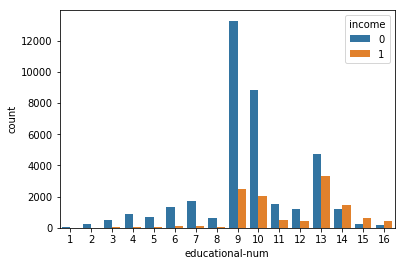

In [66]:
#Let see income according to education 

sns.countplot( x = "educational-num", hue = "income", data = df)

can see 13th(Bachelors) has >50K income but 9th(HS-grad) are highest in <50k earnings.

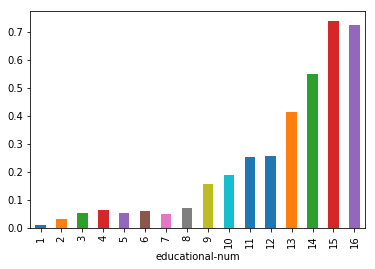

In [67]:
# checking through mean value 

df.groupby('educational-num').income.mean().plot(kind='bar')

we can see 13th (Graduate), 14th(master), 15th (professor) and 16th (doctorate) are higher paying jobs.

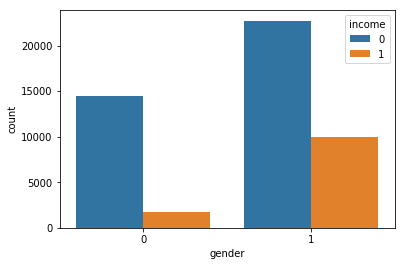

In [68]:
# let see income according to gender 

sns.countplot(x = "gender", hue = "income", data = df)

can see "male" is higher in overall income.

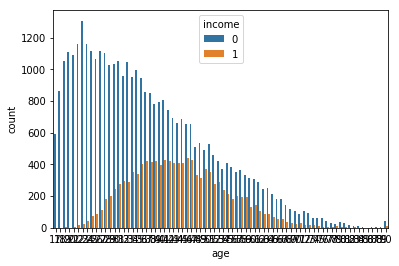

In [69]:
# let see income according to age 

sns.countplot(x = "age", hue = "income", data = df)

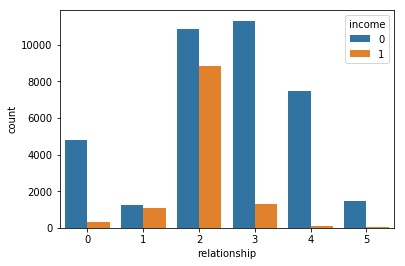

In [70]:
# Let see income according to relationship

sns.countplot( x = "relationship", hue = "income", data = df)

can see "husband" has both income high and "not-in-family" has <50k income higher than other.

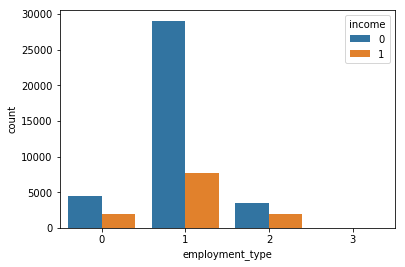

In [71]:
# let see income according to employment_type

sns.countplot( x = "employment_type", hue = "income", data = df)

private earned highest in <50k income share.

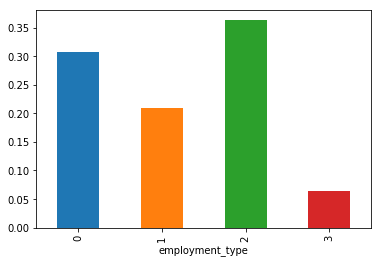

In [72]:
# checking through mean value 

df.groupby('employment_type').income.mean().plot(kind='bar')

mean value shows "self-employed" earned most of share and "govt" comes on 2nd employment to get good earning .

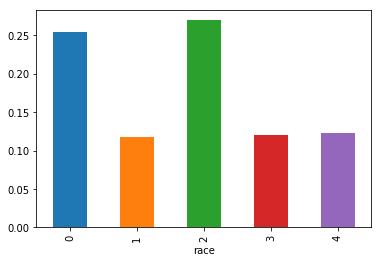

In [73]:
# let see by race with mean income 

df.groupby('race').income.mean().plot(kind='bar')

see "Asian-Pac-Islander" is highest race category to get income share and "white" is 2nd highest in sharing.

In [74]:
# age, fnlwgt and hours-per-week follows gussian distribution but need to scale data as every feature has different dimension

from sklearn.preprocessing import StandardScaler

s_scale = StandardScaler()
col_to_scale = ["age","fnlwgt","hours-per-week"]
df[col_to_scale] = s_scale.fit_transform(df[col_to_scale])

In [75]:
df.head()

,age,fnlwgt,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income,employment_type
0,-0.995129,0.351675,7,1,4,3,1,0.000000,0.0,-0.034087,1,0,1
1,-0.046942,-0.945524,9,0,2,0,1,0.000000,0.0,0.772930,1,0,1
2,-0.776316,1.394723,12,0,2,0,1,0.000000,0.0,-0.034087,1,1,0
3,0.390683,-0.277844,10,0,2,3,1,0.076881,0.0,-0.034087,1,1,1
4,-1.505691,-0.815954,10,1,4,0,0,0.000000,0.0,-0.841104,1,0,1


# Model Building

In [76]:
# create feature and split the data 


from sklearn.model_selection import train_test_split

X = df.drop(['income'], axis = 1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 22)


Now we got our data split into training and test sets so, will bulid model now

# let's select few algorithm used for classification

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [78]:
models = []
names = []
names = ['LR','Random Forest','DecisionTreeClassifier','SVM','Knn']

models.append((LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append((RandomForestClassifier(criterion = "entropy", max_depth = 9, max_features = "auto", min_samples_leaf = 5, min_samples_split = 8, n_estimators = 100)))
models.append((DecisionTreeClassifier()))
models.append((SVC()))
models.append((KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p = 2)))


In [79]:
print(models)

[LogisticRegression(max_iter=1000), RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5,
                       min_samples_split=8), DecisionTreeClassifier(), SVC(), KNeighborsClassifier()]


In [80]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [81]:
kfold = model_selection.KFold(n_splits = 5 , random_state =7, shuffle= True)

for i in range(0, len(models)):
    cv_result = model_selection.cross_val_score(models[i], X_train, y_train, cv = kfold, scoring = "accuracy")
    score = models[i].fit(X_train, y_train)
    prediction = models[i].predict(X_test)
    acc_score  = accuracy_score(y_test, prediction)
    auc_score = roc_auc_score(y_test, prediction) 

    names.append(names)
    print('-'*40)
    print( names[i] )
    print(f" The Acc score of model is {round(acc_score,3)*100} % ")   
    print(f" The AUC score is {round(auc_score,3)*100} % ")

----------------------------------------
LR
 The Acc score of model is 84.5 % 
 The AUC score is 74.5 % 
----------------------------------------
Random Forest
 The Acc score of model is 86.6 % 
 The AUC score is 75.9 % 
----------------------------------------
DecisionTreeClassifier
 The Acc score of model is 81.3 % 
 The AUC score is 74.4 % 
----------------------------------------
SVM
 The Acc score of model is 83.2 % 
 The AUC score is 70.3 % 
----------------------------------------
Knn
 The Acc score of model is 81.8 % 
 The AUC score is 72.3 % 


#as getting less accuracy with all above model , let's check with Gradient Boosting Classifier and Extreme Gradient Boosting 

# Gradient Boosting Classifier

In [82]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_classifier = GradientBoostingClassifier()

parameters = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate' : [0.01, 1, 10, 100],
    'n_estimators'  :[90, 150, 210, 280]
}

grid_search_gb_classifier =  GridSearchCV(gb_classifier, parameters, cv = 5, verbose = 1 )

grid_search_gb_classifier.fit(X_train, y_train)
    



Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 1, 10, 100],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [90, 150, 210, 280]},
             verbose=1)

In [83]:
# best_parameters_

grid_search_gb_classifier.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 90}

In [84]:
# best_score_

grid_search_gb_classifier.best_score_

0.8592237931838884

In [85]:
gb_classifier = GradientBoostingClassifier(learning_rate = 1, loss = "exponential", n_estimators = 90)

gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)

In [86]:
# accuracy_score 

print(accuracy_score(y_train, gb_classifier.predict(X_train)))

gb_classifier_acc = accuracy_score(y_test, gb_classifier.predict(X_test))

print(gb_classifier_acc)

0.872093363362485
0.867399167405992


# Extreme Gradient Boosting 

In [87]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(objective ='binary:logistic', learning_rate = 0.4, max_depth = 7, n_estimators = 150)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

C:\Users\harsha\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:05:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [88]:
# accuracy_score 

print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(xgb_acc)

0.9238351516569657
0.8671944311745036


In [89]:
# Will check with AUC -ROC curve for Gradient Boosting and Extreme Gradient boosting 

In [90]:
auc_gb = roc_auc_score(y_test, gb_classifier.predict(X_test))
print(f" The AUC Score is {round(auc_gb,3)*100} %")

 The AUC Score is 78.9 %


In [91]:
auc_xgb = roc_auc_score(y_test, xgb.predict(X_test)) 
print(f" The AUC score is {round(auc_xgb,3)*100} % ")

 The AUC score is 79.3 % 


As we can see AUC does not improve accuracy so our best model is Random Forest 

Let's dive into the random forest's metrics

# AUC Random Forest

AUC stands for Area under the curve. AUC gives the rate of successful classification by the logistic model. The AUC makes it easy to compare the ROC curve of one model to another.

In [92]:
rand_classifier = RandomForestClassifier(criterion = "entropy", max_depth = 9, max_features = "auto", min_samples_leaf = 5, min_samples_split = 8, n_estimators = 100)
rand_classifier.fit(X_train, y_train)

y_pred = rand_classifier.predict(X_test)

In [93]:
# accuracy _score 

print(accuracy_score(y_train, rand_classifier.predict(X_train)))

rand_classifier_acc = accuracy_score(y_test, rand_classifier.predict(X_test))

print(rand_classifier_acc)

0.8570300389014011
0.8652835596806114


In [94]:
train_probs = rand_classifier.predict_proba(X_train)[: , 1]
probs = rand_classifier.predict_proba(X_test)[ :, 1]
train_predictions = rand_classifier.predict(X_train)

In [107]:
def evalute_model(y_pred, probs, train_predictions, train_probs):
    
    # calculate false positive rates and true positive rates
  
    
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8,6))
    
    
    # plot both curves
    
    plt.plot(base_fpr, base_tpr, "b", label = "baseline")
    plt.plot(model_fpr, model_tpr, 'r', label = "model")
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title ("ROC Curves")
    plt.show()

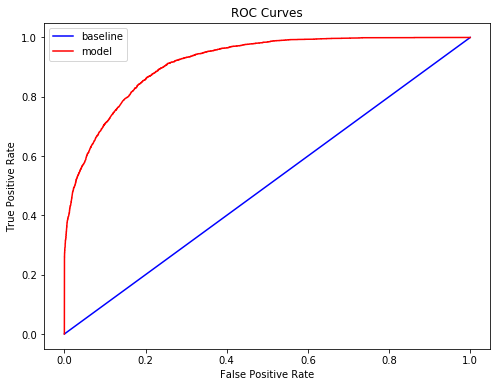

In [108]:
evalute_model(y_pred, probs, train_predictions, train_probs)

In [112]:

class_names = ['0 - <50k', '1 - >50k']
cm = confusion_matrix(y_test, y_pre
plot_confusion_matrix(cm, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
                                 title = 'Confusion Matrix')

SyntaxError: invalid syntax (<ipython-input-112-7b88185caed0>, line 4)

Confusion matrix, without normalization
[[10774   457]
 [ 1509  1913]]
Normalized confusion matrix
[[0.95930906 0.04069094]
 [0.44097019 0.55902981]]


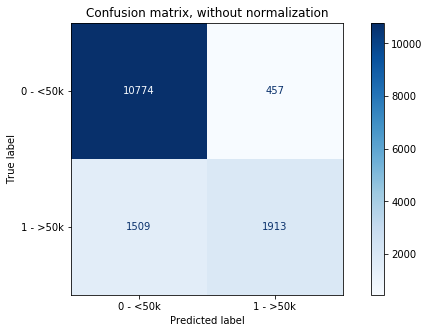

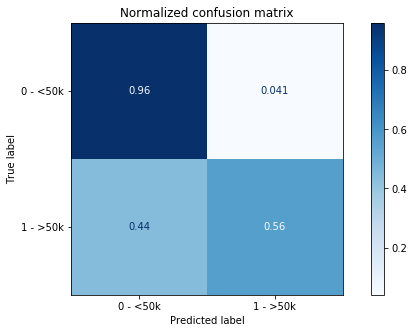

In [113]:
classifier = rand_classifier.fit(X_train, y_train)

class_names = ['0 - <50k', '1 - >50k']

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)


our best model is Random Forest 